Si c'est un corpus de plusieurs documents, veillez les separer par ***
Veillez répondre aux questions yes or no en minuscule
Vous voullez voir fréquence de mots? yes
On consiedere les mots vides?yes/no no
887  - longueur du corpus
347  - mots vides
540  - sans mots vides
show wordcloud? yes


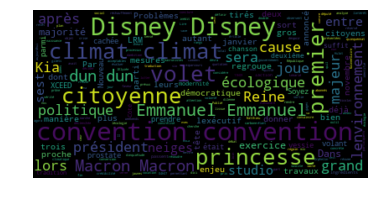

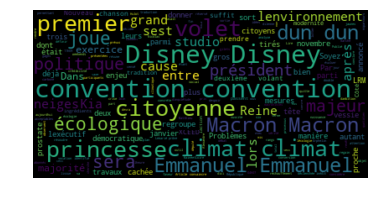

In [ ]:
import spacy
import instruments
import re
import sys
import plotly.graph_objects as go
nlp = spacy.load('fr_core_news_sm')
stop=''
#on ouvre le fichier et on stoque le contenu dans une liste
print("Si c'est un corpus de plusieurs documents, veillez les separer par ***")
print("Veillez répondre aux questions yes or no en minuscule")
with open('test.txt','r',encoding='utf-8') as corpus:
    co=corpus.readlines()
    dic=[]
    for e in co:
        e.split('\n')
        dic.append(e)
#on fait du nettoyage
dic2=[]
for e in co:
    for i in e.replace('\n','').replace('?','').replace('!','').replace('.','').replace('’','').replace(',','').split():
        dic2.append(i)
#si on est interessé au niveau des phrases dic - sans tokenization, dicc avec tokenization
dicc=[[e.replace('\n','').split()]for e in dic]
dic3=[]
for e in co:
    for i in e.split():
        dic3.append(i)
text=' '.join(dic2)
###for pos-tags
doc = nlp(text)
###for tfidf
r=text.split('***')
####les questions#####
while stop!='yes':
    if input('Vous voullez voir fréquence de mots? ')=='yes':
        motvidesquestion=input('On consiedere les mots vides?yes/no ')
        if 'no' in motvidesquestion:
            listvide=open('stopwords.txt','r',encoding='utf-8')
            lv=listvide.readlines()
            dicvide=[]
            for e in lv:
                dicvide.append(e.replace('\n','').replace('\t',''))
            liste2=instruments.tokenizer(text)
            #lenght totale
            print(len(liste2)," - longueur du corpus")
            liste4=[e for e in liste2 if e not in dicvide]
            #combien de mots vide?
            print(len(liste2)-len(liste4)," - mots vides")
            #lenght sans mots vides
            print(len(liste4)," - sans mots vides")
            instruments.frequency(liste4)
        elif 'yes' in motvidesquestion:
            liste2=instruments.tokenizer(text)
            instruments.frequency(liste2)
    elif input('Vous voullez voir les patrons morphosyntaxiques? ')=='yes':
            instruments.patterngiver(doc)
    elif input('Vous voullez voir la statistique de parties de discours? ')=='yes':
        instruments.posstats(doc)
    elif input('Vous voullez voir la statistique de signes de ponctuation? ')=='yes':
        #combien de phrases interogatives?
        cptinterog=0
        for e in dicc:
            for i in e:
                if '?' in i:
                    cptinterog+=1
        print(cptinterog,"- ?")
        #combien de phrases exclamatives?
        cptex=0
        for e in dic3:
            for i in e:
                if '!' in i:
                    cptex+=1
        print(cptex,"- !")
        #combien de phrases avec points de suspension?
        cptpts=0
        for e in dic3:
            if '...' in e:
                cptpts+=1
        print(cptpts,"- ...")
    elif input('Vous voullez voir la specificité du mot? ')=='yes':
        instruments.specificity(text)
    elif input('Vous voullez voir les phrases nominales? ')=='yes':
        instruments.phrasesnominales(dic)
    elif input('Vous voullez voir la statistique de longueur des mots? ')=='yes':
        instruments.longuermots(doc)
    elif input('Vous voullez voir le contexte des mots que vous indiquez? ')=='yes':
        instruments.contexte(text,dic3)
    elif input('Vous voullez voir tf-idf? ')=='yes':
        instruments.tfidfer(r)
    stop=input('if you want to stop écris yes, sinon no')

In [ ]:
##gives liste of words poatags and syntax rol
for token in doc:
    
    print(token.text, token.pos_, token.dep_)
#print([(word.text, word.pos_) for word in doc])

In [6]:
import plotly.graph_objs as go

In [6]:
with open('test.txt','r',encoding='utf-8') as corpus:
    co=corpus.readlines()
    new = re.sub(r'[^\w\s]', '', ' '.join(co))
    liste = new.lower().split()
    

In [7]:
print(liste)

['avec', 'la', 'convention', 'citoyenne', 'pour', 'le', 'climat', 'emmanuel', 'macron', 'joue', 'sa', 'crédibilité', 'écologique', 'dans', 'la', 'majorité', 'on', 'considère', 'que', 'cet', 'exercice', 'démocratique', 'qui', 'regroupe', '150', 'citoyens', 'tirés', 'au', 'sort', 'sera', 'un', 'enjeu', 'politique', 'majeur', 'pour', 'le', 'président', 'par', 'alexandre', 'lemarié', 'publié', 'aujourdhui', 'à', '04h07', 'mis', 'à', 'jour', 'à', '11h09', 'comment', 'rendre', 'acceptables', 'sur', 'le', 'plan', 'social', 'des', 'mesures', 'en', 'faveur', 'de', 'lenvironnement', 'après', 'la', 'crise', 'des', 'gilets', 'jaunes', 'déclenchée', 'à', 'cause', 'de', 'la', 'taxe', 'carbone', 'a', 'lissue', 'du', 'grand', 'débat', 'emmanuel', 'macron', 'avait', 'annoncé', 'la', 'naissance', 'dun', 'outil', 'censé', 'résoudre', 'ce', 'dilemme', 'la', 'convention', 'citoyenne', 'pour', 'le', 'climat', 'cet', 'exercice', 'démocratique', 'inédit', 'qui', 'regroupe', '150', 'citoyens', 'tirés', 'au', '

In [8]:
texte=' '.join(liste)
import spacy
nlp = spacy.load('fr_core_news_sm')
doc = nlp(text)

In [9]:
def posstats(doc):
    t=[ word.pos_ for word in doc]
    liste_of_frequence= [t.count(e) for e in t]
#les valeurs seront les nombres d'occurences dans le deuxieme liste(liste_of_frequence)
    dictionary = dict(zip(t,liste_of_frequence))
    list_key_value = [ [k,v] for v, k in dictionary.items() ]
    #freqplot(dictionary)
    for w in sorted(dictionary, key=dictionary.get, reverse=True):
        print (w, dictionary[w])

In [10]:
posstats(doc)

NOUN 241
DET 146
ADP 137
ADJ 97
VERB 97
PROPN 46
ADV 42
PRON 34
PUNCT 27
AUX 25
CCONJ 17
NUM 11
SCONJ 9
X 1
